# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
# Redo all the imports to set up the plot libs.
# Import the data file and verify the columns.

%matplotlib inline

import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

json.load(open('data/world_bank_projects.json'))
df = pd.read_json('data/world_bank_projects.json')
df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

# Question 1:  Find the 10 countries with most projects

For question 1, a dataframe of only country names and shortnames is used in order to count the projects for each country.  The 10 countries with the highest number of projects are listed and shown on a plot to aid comprehension.

Ten Countries With the Most Projects
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


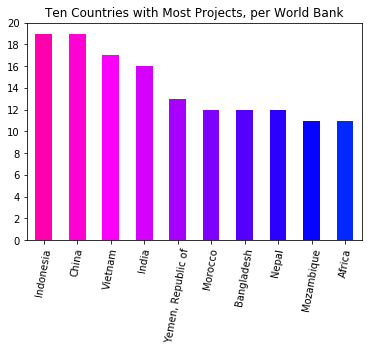

In [2]:
# Set up the country names in their own dataframe.
top_countries = df.loc[:, ['countryname', 'countryshortname', 'countrycode']]

# Print a list of the 10 contries and the number of projects.
print('Ten Countries With the Most Projects')
print(top_countries['countryname'].value_counts()[:10])

# Set the color and plot information.
color_country = cm.hsv(np.linspace(.9,.65, 10))
top_countries['countryshortname'].value_counts()[:10].plot(title='Ten Countries with Most Projects, per World Bank',
                                                           x='countryshortname', kind='bar', 
                                                           yticks=range(0,22,2), color=color_country, rot=80);

# Question 2:  Find the top 10 major project themes (using column 'mjtheme_namecode')

For questions 2 and 3, a dataframe has been created from the 'mjtheme_namecode' column, comprised of a numeric code and alphanumeric description (name).  

When performing a cursory examination of the themes, it becomes obvious that some cells contain blank spaces.  The below cell shows the most common themes by the numeric code.  The cell after that shows the list of theme names and a plot of the frequency of the names with attention paid to the 122 blank name cells.

In [3]:
# Create an empty dataframe and fill in the values from the nested json table, then reset the index.
themes = pd.DataFrame(columns=['code', 'name'])
for row in df.mjtheme_namecode:
    themes = themes.append(json_normalize(row))
themes.reset_index(drop=True, inplace=True)

# Group the themes by 'code' and print a list of the 10 most frequent themes by code value.
print('Ten Most Common Themes (by theme code)')
print(themes['code'].value_counts()[:10])

Ten Most Common Themes (by theme code)
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64


Ten Most Common Themes (by theme name)
name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64


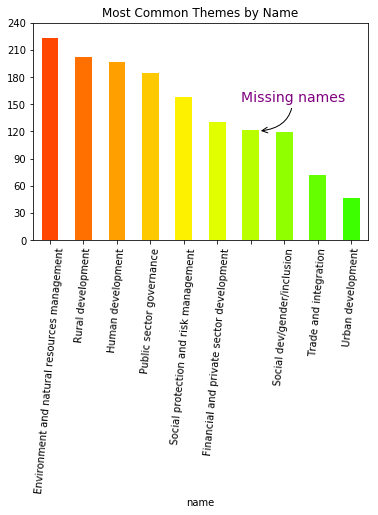

In [4]:
# Check to see if the number of names matches the number of codes and print the 10 most frequent by name.
themes_group = themes.groupby('name').size().sort_values(ascending=False)
print('Ten Most Common Themes (by theme name)')
print(themes_group.head(10))

# Set the color and plot information.
color = cm.hsv(np.linspace(.05,.3, 10))
ax = themes_group.iloc[:10].plot(kind='bar', yticks=range(0,250,30), color=color, rot=85, title='Most Common Themes by Name')
# Set an arrow to point out the high number of missing names.
ax.annotate('Missing names', xy=(6, 120), xycoords='data', xytext=(-10, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', shrinkB=10, connectionstyle='angle3'), size=14, color='purple');

# Question 3:  In 2 above you will notice that some entries have only the code and the name is missing.  Create a dataframe with the missing names filled in.

While 'Environment and natural resources management' is code 11, there are 250 matches for '11' and only 223 matches on the name.  The repaired dataframe and process are below.  As you can see, code 11 now matches, and 'Economic Management' (code 1) has joined the names list.

Ten Most Common Themes (by theme name, repaired)
name_repaired
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64


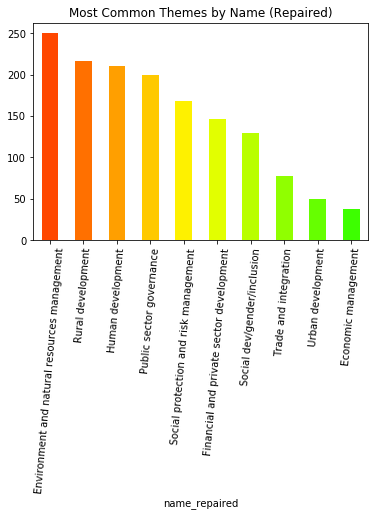

In [5]:
# Create an empty dictionary and fill it with a set of the correct code/name pairs.
codes_dict = {}
for row in df.mjtheme_namecode:
    for key, item in enumerate(row):
        if item['code'] not in codes_dict and item['name'] != '':
            codes_dict[item['code']] = item['name']

# Replace the '' blanks with np.nan and use a fillna map to populate a new column from our code/name dictionary. 
themes_fixed = themes.copy()
themes_fixed.replace(r'^\s*$', np.nan, regex=True, inplace=True)
themes_fixed['name_repaired'] = themes_fixed.name.fillna(themes_fixed.code.map(codes_dict))

# Print the 10 most frequent names to see if the number of names matches the expected number.
print('Ten Most Common Themes (by theme name, repaired)')
themes_group_fixed = themes_fixed.groupby('name_repaired').size().sort_values(ascending=False)
print(themes_group_fixed.head(10))

# Set the color and plot information.
color = cm.hsv(np.linspace(.05,.3, 10))
themes_group_fixed.iloc[:10].plot(kind='bar', yticks=range(0,300,50), color=color, rot=85, 
                                  title='Most Common Themes by Name (Repaired)');